In [2]:
import numpy as np
from sklearn.datasets import load_digits
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV, KFold 
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.metrics import accuracy_score
from math import sqrt
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/home/pik/.local/lib/python3.5/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['sqrt']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [3]:
def write_answer(answer, filename):
    with open(filename, "w") as fout:
        fout.write(str(answer))

Загрузка данных из датасета и формирование матрицы признаков и целевой переменной

In [4]:
dataset = load_digits()
X = dataset.data
y = dataset.target

Создадим и обучим решающее дерево

In [5]:
classifier = DecisionTreeClassifier()
scores = cross_val_score(classifier, X, y, cv=10)
mean_score = scores.mean()
write_answer(mean_score, '1.txt')
mean_score

0.83136435451279866

Построим композицию из 100 решающих деревьев

In [6]:
bagging = BaggingClassifier(base_estimator=classifier, n_estimators=100)
scores = cross_val_score(bagging, X, y, cv=10)
mean_score = scores.mean()
write_answer(mean_score, '2.txt')
mean_score

0.92324576823033033

Вычислим корень из общего числа признаков

In [7]:
d = int(sqrt(X.shape[1]))

Обучим каждое дерево композиции на случайном подмножестве признаков.

In [8]:
strip_bagging = BaggingClassifier(base_estimator=classifier, n_estimators=100, max_features=d)
scores = cross_val_score(bagging, X, y, cv=10)
mean_score = scores.mean()
write_answer(mean_score, '3.txt')
mean_score

0.92100079701167414

Обучим каждое дерево признаков на своем случайном подмножестве признаков.

In [9]:
strip_classifier = DecisionTreeClassifier(max_features=d)
bagging = BaggingClassifier(base_estimator=strip_classifier, n_estimators=100)
scores = cross_val_score(bagging, X, y, cv=10)
mean_score = scores.mean()
write_answer(mean_score, '4.txt')
mean_score

0.94889042018999104

Проверим случайный лес на переобучение при изменении числа деревьев, на различие качества при малом числе и большом числе деревьев деревьев, а также то, как меняется точность в зависимости от числа деревьев в лесе (пункты 1, 2, 3, 4) 

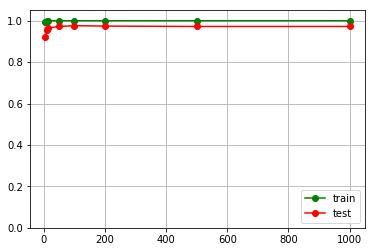

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
numbers_of_trees = [5, 10, 15, 50, 100, 200, 500, 1000]


train_scores = []
test_scores = []
for n in numbers_of_trees:
    ran_for_cl = RandomForestClassifier(n_estimators=n)
    ran_for_cl.fit(X_train, y_train)
    train_scores.append(ran_for_cl.score(X_train, y_train))
    test_scores.append(ran_for_cl.score(X_test, y_test))
    
pylab.grid(True)
pylab.plot(numbers_of_trees, train_scores, 'g-', marker='o', label='train')
pylab.plot(numbers_of_trees, test_scores, 'r-', marker='o', label='test')
pylab.ylim((0.0, 1.05))
pylab.legend(loc='lower right')

Сравнение результатов при полном использовании признаков и при использовании небольшой части.

Будем использовать все доступные признаки

In [11]:
ran_for_cl = RandomForestClassifier(n_estimators=200, max_features=X_train.shape[1])
scores = cross_val_score(ran_for_cl, X, y, cv=10)
mean_score = scores.mean()
mean_score

0.92494854627203293

А теперь возьмем только часть.

In [12]:
ran_for_cl = RandomForestClassifier(n_estimators=200, max_features=d)
scores = cross_val_score(ran_for_cl, X, y, cv=10)
mean_score = scores.mean()
mean_score

0.95053590778808716

Сравнение результатов без ограничения глубины и с ограничением глубины (пункты 6, 7).

Без ограничения глубины.

In [13]:
ran_for_cl = RandomForestClassifier(n_estimators=200)
scores = cross_val_score(ran_for_cl, X, y, cv=10)
mean_score = scores.mean()
mean_score

0.95721922044385932

Ограничим глубину.

In [14]:
ran_for_cl = RandomForestClassifier(n_estimators=200, max_depth=2)
scores = cross_val_score(ran_for_cl, X, y, cv=10)
mean_score = scores.mean()
mean_score

0.80843028628065561

In [15]:
write_answer('2 3 4 7', '5.txt')